# 02. Exploration des données

In [2]:
%run A_Préparation_des_données.ipynb

trainfull : (1460, 81)
testfull : (1459, 80)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         146

A_Préparation_des_données.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
A_Préparation_des_données.ipynb:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cells": [
A_Préparation_des_données.ipynb:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "cell_type": "markdown",


### Analyse de l'output (`SalePrice`)

In [3]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Distribution

#### Aperçu Histogramme :

Nous allons définir une fonction pour voir comment les valeurs SalesPrice sont distribuées. Idéalement, les données devraient être distribuées normalement, ce qui signifie que toutes les valeurs sont distribuées symétriquement autour de la moyenne. Ceci est important car nous devons avoir la même quantité de données à gauche et à droite de la moyenne, sinon le modèle sera forcé de calculer avec certains points qui sont éloignés. Ce fait générera des modèles non robustes.

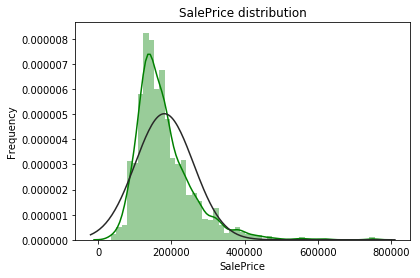

In [4]:
from scipy.stats import norm

def distribution_plot(data):
    sns.distplot(data, fit=norm, color='g',)
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')
    
distribution_plot(train['SalePrice'])

#### Coefficients de skewness and kurtosis

In [5]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Conclusion :<br>
On peut voir ici que la répartition de `SalePrice` ne suit pas une loi normale et la densité a un pic plus important que celle-ci. Pour corriger cette asymétrie nous allons utiliser la fonction "log".

c:\users\utilisateur\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


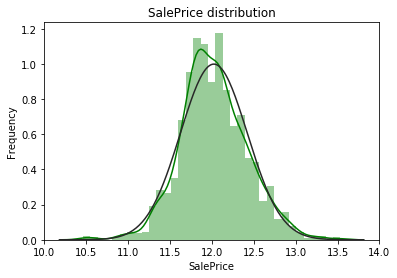

In [6]:
train["SalePrice"] = np.log1p(train["SalePrice"])

distribution_plot(train['SalePrice'])

## Outliers

Définissons une limite supérieure et inférieure basée sur le niveau de confiance de 99%. Les valeurs situées au-dessus de cette limite seront considérées comme outliers. Nous allons faire le choix de les supprimer.

c:\users\utilisateur\python\python37\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
c:\users\utilisateur\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Sale Price')

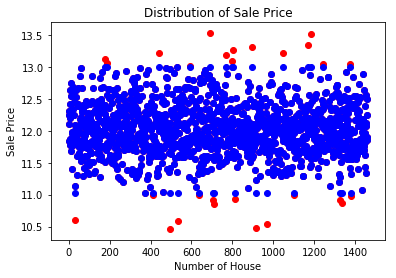

In [7]:
upperlimit = np.percentile(train.SalePrice.values, 99)
lowerlimit = np.percentile(train.SalePrice.values, 1)

# Raw values of houses are plotted in orange
plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='red')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Houses")
plt.ylabel("Sale Price");

train['SalePrice'].loc[train['SalePrice']>upperlimit] = upperlimit
train['SalePrice'].loc[train['SalePrice']<lowerlimit] = lowerlimit

# Corrected values, after removing the outliers

plt.scatter(range(train.shape[0]), train["SalePrice"].values,color='blue')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of House")
plt.ylabel("Sale Price")

En regardant ce graphique, nous pouvons voir que les valeurs en bleu sont celles dans l'intervalle de confiance défini (avec les limites supérieure et inférieure). Les valeurs en rouges sont celles qui sont à l'extérieur et sont donc les outliers. Nous les avons supprimés pour une meilleure accuracy.

In [8]:
train = train[train['SalePrice'] < upperlimit]
train = train[train['SalePrice'] > lowerlimit]

Sauvegardons notre travail :

In [10]:
train.to_csv("data/train_prepared.csv")